# Import Library yang Digunakan

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, Dense, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Preparing Data

In [ ]:
df = pd.read_csv("Fuel_All_new.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   410nm   120 non-null    float64
 1   435nm   120 non-null    float64
 2   460nm   120 non-null    float64
 3   485nm   120 non-null    float64
 4   510nm   120 non-null    float64
 5   535nm   120 non-null    float64
 6   560nm   120 non-null    float64
 7   585nm   120 non-null    float64
 8   610nm   120 non-null    float64
 9   645nm   120 non-null    float64
 10  680nm   120 non-null    float64
 11  705nm   120 non-null    float64
 12  730nm   120 non-null    float64
 13  760nm   120 non-null    float64
 14  810nm   120 non-null    float64
 15  860nm   120 non-null    float64
 16  900nm   120 non-null    float64
 17  940nm   120 non-null    float64
 18  Label   120 non-null    int64  
dtypes: float64(18), int64(1)
memory usage: 17.9 KB
None


410nm     435nm     460nm     485nm     510nm      535nm     560nm  \
0  5.781671  0.973846  8.808283  1.865597  2.307474  26.153601  0.528764   
1  5.781671  0.973846  8.808283  1.865597  2.307474  26.153601  0.528764   
2  5.781671  0.973846  8.808283  1.865597  2.307474  26.153601  0.528764   
3  5.781671  0.973846  8.808283  1.865597  2.307474  26.153601  0.528764   
4  5.781671  0.973846  8.808283  1.865597  2.307474  26.153601  0.528764   

      585nm     610nm     645nm     680nm     705nm    730nm     760nm  \
0  0.483108  1.144847  0.414716  1.022089  0.396527  0.77965  0.843226   
1  0.483108  1.144847  0.414716  1.022089  0.396527  0.77965  0.843226   
2  0.483108  1.144847  0.414716  1.022089  0.396527  0.77965  0.843226   
3  0.483108  1.144847  0.414716  1.022089  0.396527  0.77965  0.843226   
4  0.483108  1.144847  0.414716  1.022089  0.396527  0.77965  0.843226   

      810nm     860nm     900nm     940nm  Label  
0  1.649171  1.158214  0.637623  0.939268    100  
1  1.649171  1.158214  0.637623  0.939268    100  
2  1.649171  1.158214  0.637623  0.939268    100  
3  1.649171  1.158214  0.637623  0.939268    100  
4  1.649171  1.158214  0.637623  0.939268    100

In [ ]:
df_100 = df[df['Label'] == 100]
df_90 = df[df['Label'] == 90]
df_80 = df[df['Label'] == 80]
df_70 = df[df['Label'] == 70]
df_60 = df[df['Label'] == 60]
df_50 = df[df['Label'] == 50]

# Ambil rata-rata untuk setiap panjang gelombang
wavelengths = df_100.columns[:-1]
print(wavelengths)

mean_spectrum = df_100[wavelengths].mean()
mean_spectrum_90 = df_90[wavelengths].mean()
mean_spectrum_80 = df_80[wavelengths].mean()
mean_spectrum_70 = df_70[wavelengths].mean()
mean_spectrum_60 = df_60[wavelengths].mean()
mean_spectrum_50 = df_50[wavelengths].mean()

wavelengths_numeric = mean_spectrum.index.str.replace('nm', '').astype(float)
print(wavelengths_numeric)


Index(['410nm', '435nm', '460nm', '485nm', '510nm', '535nm', '560nm', '585nm',
       '610nm', '645nm', '680nm', '705nm', '730nm', '760nm', '810nm', '860nm',
       '900nm', '940nm'],
      dtype='object')
Index([410.0, 435.0, 460.0, 485.0, 510.0, 535.0, 560.0, 585.0, 610.0, 645.0,
       680.0, 705.0, 730.0, 760.0, 810.0, 860.0, 900.0, 940.0],
      dtype='float64')


In [6]:
import matplotlib

plt.rcParams['font.family'] = 'DejaVu Serif'

# Data Spektroskopi Sampel 100% RON 92

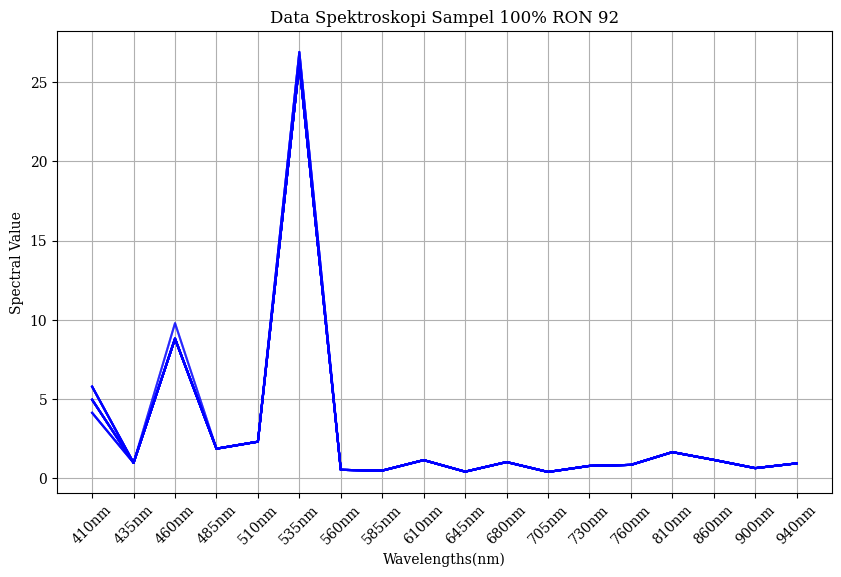

In [7]:
plt.figure(figsize=(10, 6))

for index, row in df_100.iterrows():
    plt.plot(wavelengths, row[:-1].values, linestyle='-', alpha=0.6, color='blue')

plt.title("Data Spektroskopi Sampel 100% RON 92")
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Spectral Value")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Data Spektroskopi Sampel 90% RON 92

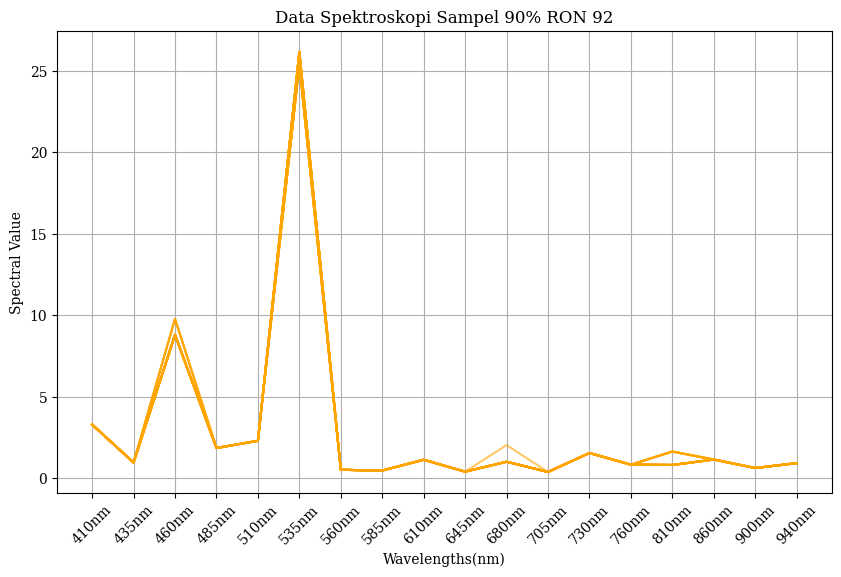

In [8]:
plt.figure(figsize=(10, 6))

for index, row in df_90.iterrows():
    plt.plot(wavelengths, row[:-1].values, linestyle='-', alpha=0.6, color='orange')

plt.title("Data Spektroskopi Sampel 90% RON 92")
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Spectral Value")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Data Spektroskopi Sampel 80% RON 92

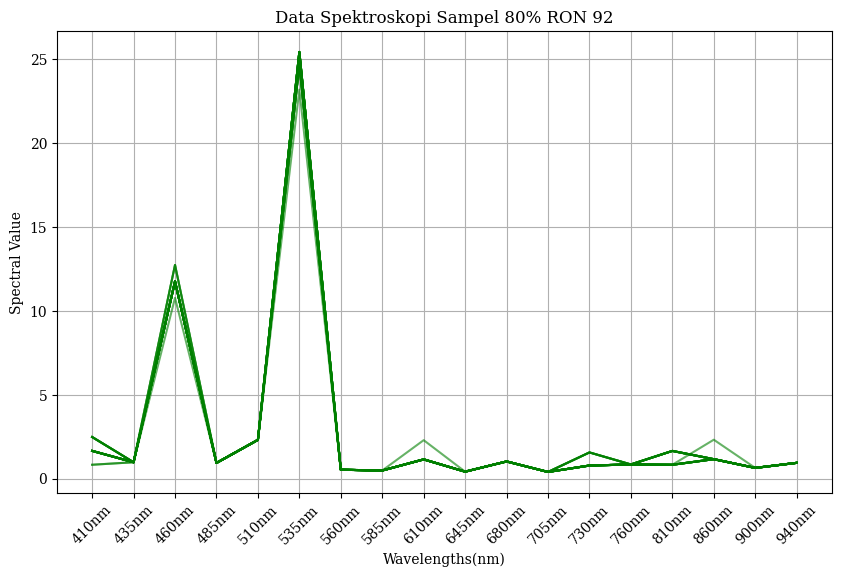

In [9]:
plt.figure(figsize=(10, 6))

for index, row in df_80.iterrows():
    plt.plot(wavelengths, row[:-1].values, linestyle='-', alpha=0.6, color='green')

plt.title("Data Spektroskopi Sampel 80% RON 92")
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Spectral Value")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Data Spektroskopi Sampel 70% RON 92

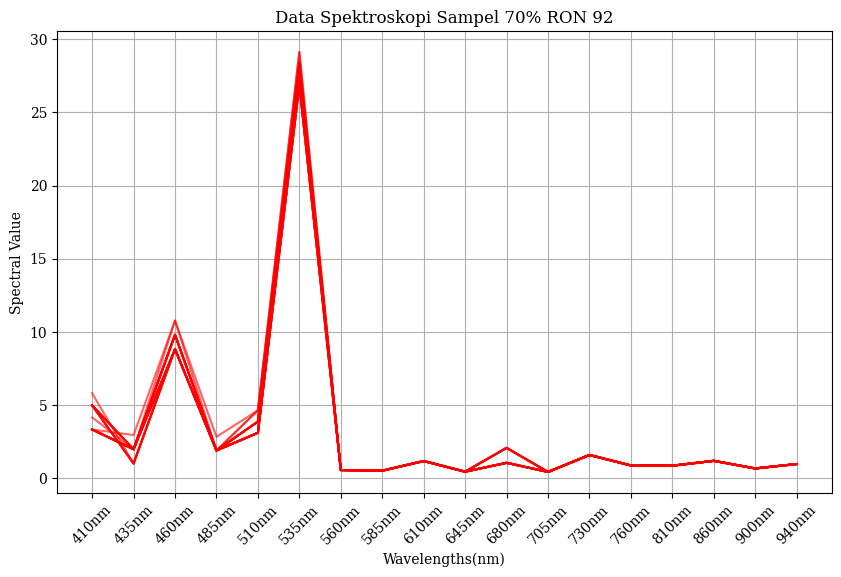

In [10]:
plt.figure(figsize=(10, 6))

for index, row in df_70.iterrows():
    plt.plot(wavelengths, row[:-1].values, linestyle='-', alpha=0.6, color='red')

plt.title("Data Spektroskopi Sampel 70% RON 92")
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Spectral Value")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Data Spektroskopi Sampel 60% RON 92

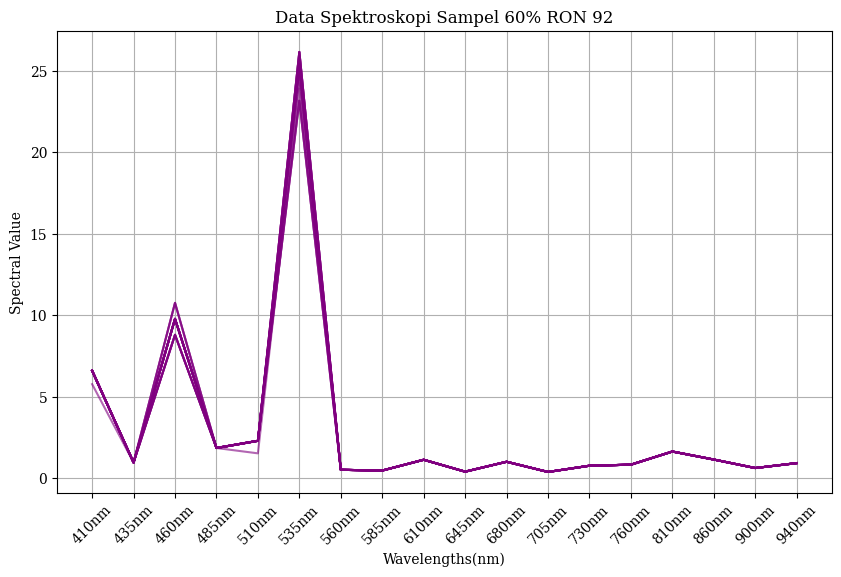

In [11]:
plt.figure(figsize=(10, 6))

for index, row in df_60.iterrows():
    plt.plot(wavelengths, row[:-1].values, linestyle='-', alpha=0.6, color='purple')

plt.title("Data Spektroskopi Sampel 60% RON 92")
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Spectral Value")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Data Spektroskopi Sampel 50% RON 92

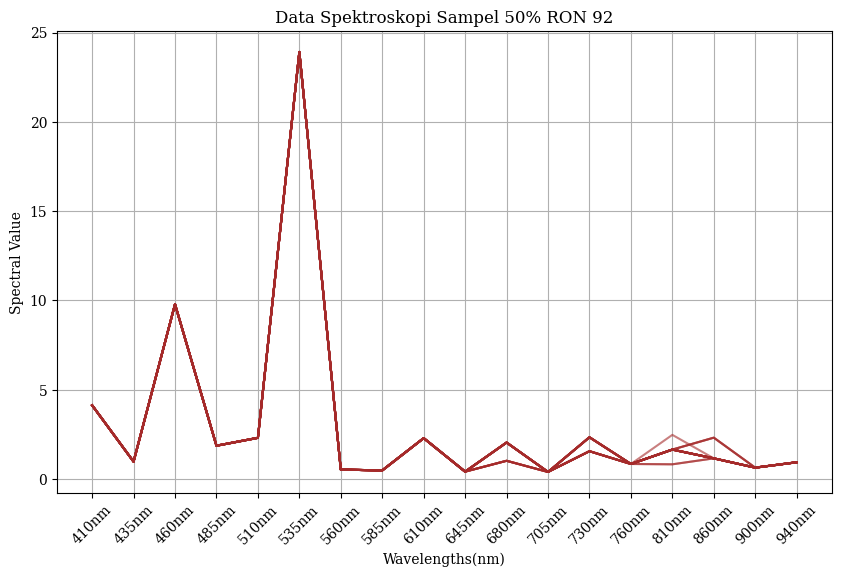

In [12]:
plt.figure(figsize=(10, 6))

for index, row in df_50.iterrows():
    plt.plot(wavelengths, row[:-1].values, linestyle='-', alpha=0.6, color='brown')

plt.title("Data Spektroskopi Sampel 50% RON 92")
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Spectral Value")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# RATA RATA DATA SPEKTROSKOPI SAMPEL 100% RON 92


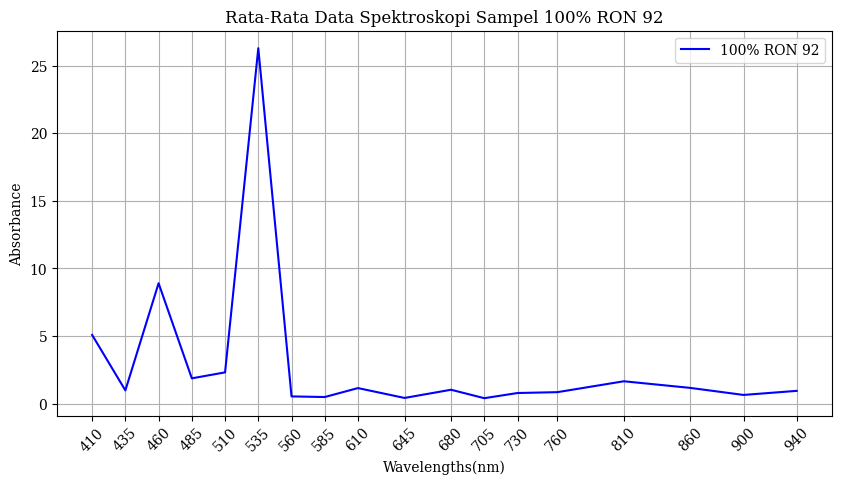

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_numeric, mean_spectrum.values, linestyle='-', label="100% RON 92", color='blue')
plt.xticks(wavelengths_numeric, rotation=45)
# Konfigurasi plot
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Absorbance")
plt.title("Rata-Rata Data Spektroskopi Sampel 100% RON 92",fontsize=12)
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

# RATA RATA DATA SPEKTROSKOPI SAMPEL 90% RON 92

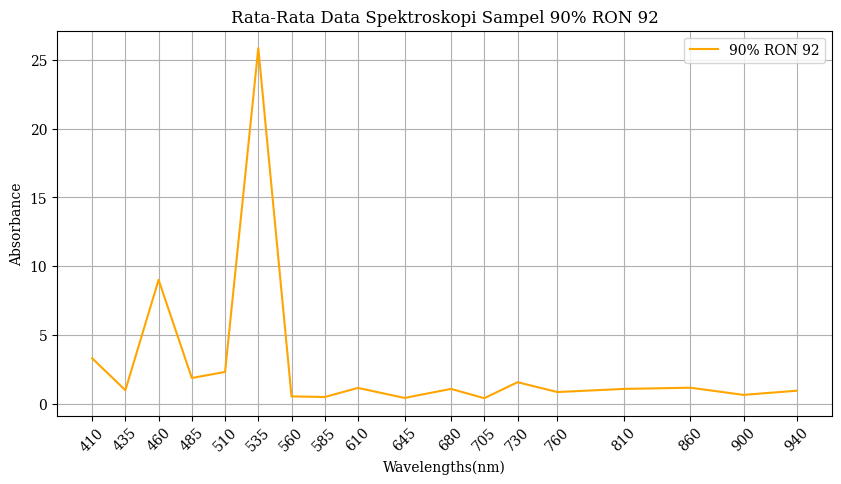

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_numeric, mean_spectrum_90.values, linestyle='-', label="90% RON 92", color='orange')
plt.xticks(wavelengths_numeric, rotation=45)
# Konfigurasi plot
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Absorbance")
plt.title("Rata-Rata Data Spektroskopi Sampel 90% RON 92",fontsize=12)
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

# RATA RATA DATA SPEKTROSKOPI SAMPEL 80% RON 92

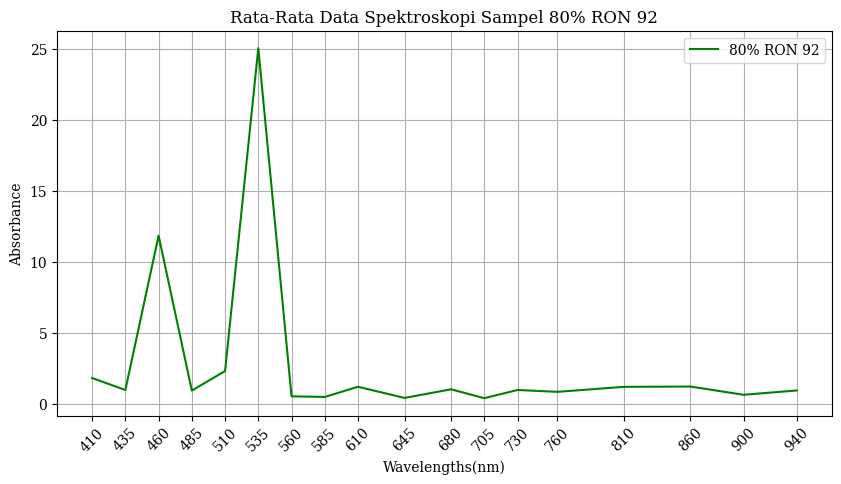

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_numeric, mean_spectrum_80.values, linestyle='-', label="80% RON 92", color='green')
plt.xticks(wavelengths_numeric, rotation=45)
# Konfigurasi plot
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Absorbance")
plt.title("Rata-Rata Data Spektroskopi Sampel 80% RON 92",fontsize=12)
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

# RATA RATA DATA SPEKTROSKOPI SAMPEL 70% RON 92

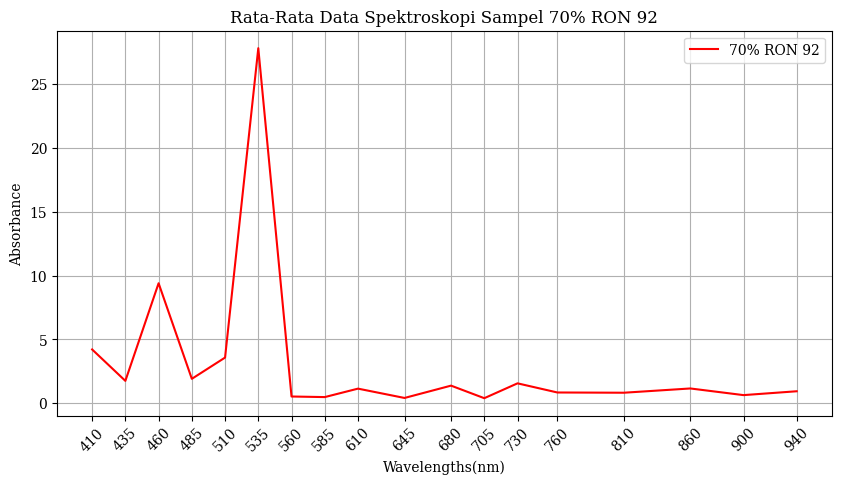

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_numeric, mean_spectrum_70.values, linestyle='-', label="70% RON 92", color='red')
plt.xticks(wavelengths_numeric, rotation=45)
# Konfigurasi plot
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Absorbance")
plt.title("Rata-Rata Data Spektroskopi Sampel 70% RON 92",fontsize=12)
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

# RATA RATA DATA SPEKTROSKOPI SAMPEL 60% RON 92

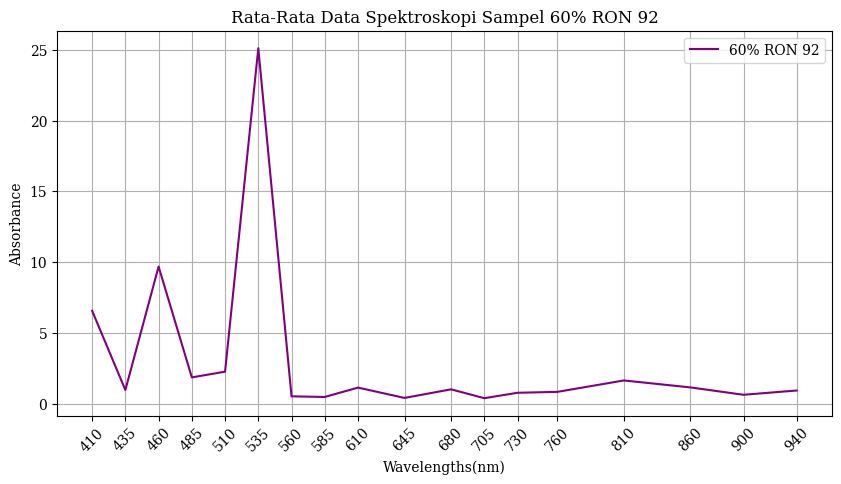

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_numeric, mean_spectrum_60.values, linestyle='-', label="60% RON 92", color='purple')
plt.xticks(wavelengths_numeric, rotation=45)
# Konfigurasi plot
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Absorbance")
plt.title("Rata-Rata Data Spektroskopi Sampel 60% RON 92",fontsize=12)
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

# RATA RATA DATA SPEKTROSKOPI SAMPEL 50% RON 92

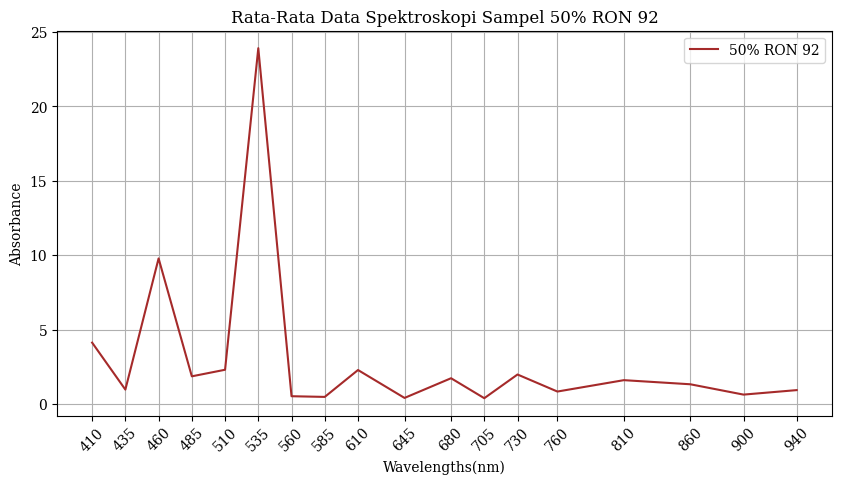

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_numeric, mean_spectrum_50.values, linestyle='-', label="50% RON 92", color='brown')
plt.xticks(wavelengths_numeric, rotation=45)
# Konfigurasi plot
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Absorbance")
plt.title("Rata-Rata Data Spektroskopi Sampel 50% RON 92",fontsize=12)
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

# PERBDANDINGAN RATA RATA DATA SPEKTROSKOPI ANTAR SAMPEL

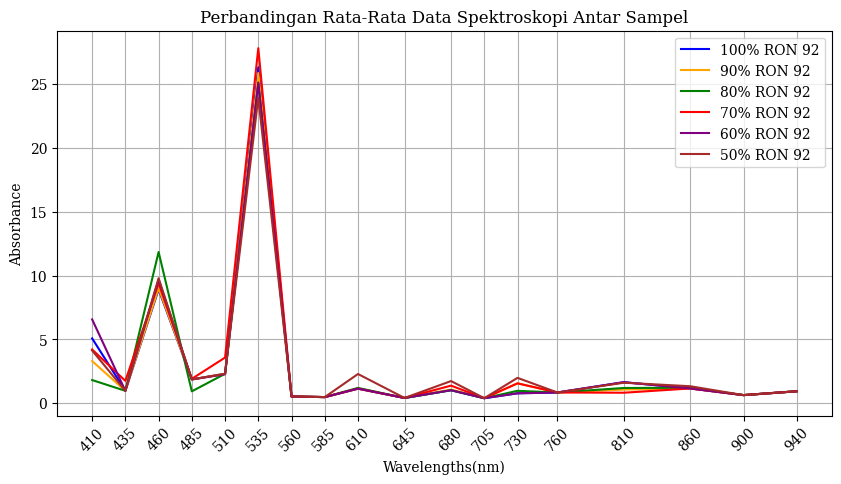

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_numeric, mean_spectrum.values, linestyle='-', label="100% RON 92", color='blue')
plt.plot(wavelengths_numeric, mean_spectrum_90.values, linestyle='-', label="90% RON 92",color='orange')
plt.plot(wavelengths_numeric, mean_spectrum_80.values, linestyle='-', label="80% RON 92",color='green')
plt.plot(wavelengths_numeric, mean_spectrum_70.values, linestyle='-', label="70% RON 92",color='red')
plt.plot(wavelengths_numeric, mean_spectrum_60.values, linestyle='-', label="60% RON 92",color='purple')
plt.plot(wavelengths_numeric, mean_spectrum_50.values, linestyle='-', label="50% RON 92",color='brown')
plt.xticks(wavelengths_numeric, rotation=45)
# Konfigurasi plot
plt.xlabel("Wavelengths(nm)")
plt.ylabel("Absorbance")
plt.title("Perbandingan Rata-Rata Data Spektroskopi Antar Sampel",fontsize=12)
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

#DATASET

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Scaling untuk X
scaler_X = RobustScaler()
X = scaler_X.fit_transform(X)

# Scaling untuk y
scaler_y = RobustScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Split dataset menggunakan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for Conv1D (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Konversi ke tf.data.Dataset
X_train_ds = tf.data.Dataset.from_tensor_slices(X_train)
y_train_ds = tf.data.Dataset.from_tensor_slices(y_train)
X_test_ds = tf.data.Dataset.from_tensor_slices(X_test)
y_test_ds = tf.data.Dataset.from_tensor_slices(y_test)

train_ds = (
    tf.data.Dataset.zip((X_train_ds, y_train_ds))
    .shuffle(buffer_size=1000, seed=42)
    .batch(8)
    .cache()
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = (
    tf.data.Dataset.zip((X_test_ds, y_test_ds))
    .batch(8)
    .prefetch(tf.data.AUTOTUNE)
)

def inverse_transform_y(predictions):
    return scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()



In [21]:
import joblib

# Simpan scaler ke file
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')


['scaler_y.pkl']

# Build Model

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(18,1), name='Conv1D_1'))

model.add(MaxPooling1D(pool_size=2, name='Maxpooling1D'))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', name='Conv1D_2'))
# Flatten layer
model.add(Flatten(name='Flatten'))

# Fully Connected Layers
model.add(Dense(64, activation='relu', name='Dense_1'))
model.add(Dense(32, activation='relu', name='Dense_2'))

model.add(Dense(1, name='Output'))
model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[tf.keras.metrics.R2Score()])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)                    │ (None, 14, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Maxpooling1D (MaxPooling1D)          │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_2 (Conv1D)                    │ (None, 5, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 64)                  │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,977 (74.13 KB)

 Trainable params: 18,977 (74.13 KB)

 Non-trainable params: 0 (0.00 B)

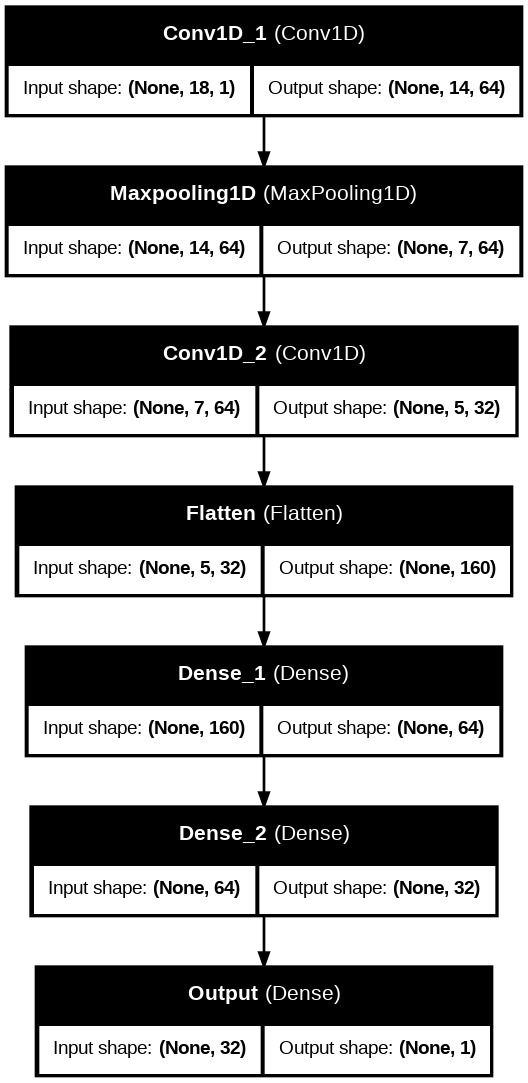

In [24]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True, rankdir="TB", dpi=96)



In [25]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)
]

# Train Model

In [26]:
hist = model.fit(
    train_ds,
    epochs=300,
    validation_data=test_ds,
    callbacks=callbacks
)

Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.2990 - r2_score: 0.1072 - val_loss: 0.1801 - val_r2_score: 0.4013 - learning_rate: 0.0010
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1573 - r2_score: 0.5266 - val_loss: 0.0945 - val_r2_score: 0.6857 - learning_rate: 0.0010
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1053 - r2_score: 0.6829 - val_loss: 0.0641 - val_r2_score: 0.7870 - learning_rate: 0.0010
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0537 - r2_score: 0.8382 - val_loss: 0.0415 - val_r2_score: 0.8620 - learning_rate: 0.0010
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0262 - r2_score: 0.9215 - val_loss: 0.0389 - val_r2_score: 0.8707 - learning_rate: 0.0010
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - r2_score: 0.9572 - val_loss: 0.0339 - val_r2_score: 0.8872 - learning_rate: 0.0010
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - r2_score: 0.9691 - val_l

# Eval Model

47 47


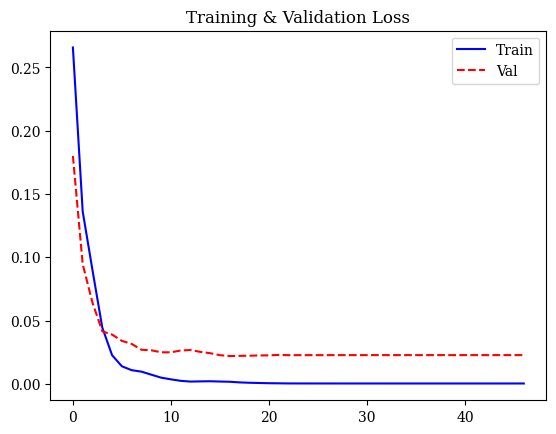

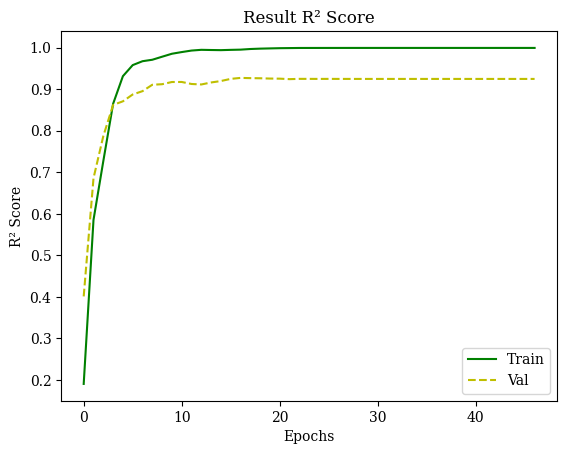

In [27]:
def plot_history(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_R2 = history.history['r2_score']
  val_R2 = history.history['val_r2_score']
  print(len(train_loss), len(val_loss))

  plt.figure()
  plt.title("Training & Validation Loss")
  plt.plot(train_loss, 'b-', label='Train Loss')
  plt.plot(val_loss, 'r--', label='Validation Loss')
  plt.legend(['Train', 'Val'])
  plt.figure()
  plt.title("Result R² Score")
  plt.plot(train_R2,  'g-', label='Train R² Score')
  plt.plot(val_R2, 'y--', label='Validation R² Score')
  plt.xlabel('Epochs')
  plt.ylabel('R² Score')
  plt.legend(['Train', 'Val'])
  plt.show()

plot_history(hist)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


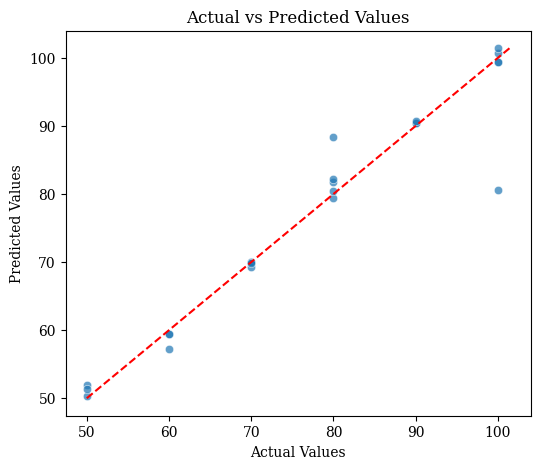

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prediksi hasil dengan model yang sudah dilatih
y_pred = model.predict(X_test)
y_pred_inv = inverse_transform_y(y_pred)
y_test_inv = inverse_transform_y(y_test)
# Plot scatter Actual vs Predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test_inv.flatten(), y=y_pred_inv.flatten(), alpha=0.7)

# Garis referensi y = x (ideal jika prediksi sempurna)
min_val = min(y_test_inv.min(), y_pred_inv.min())
max_val = max(y_test_inv.max(), y_pred_inv.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="red")

# Label dan judul
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

plt.show()


In [29]:
y_pred = model.predict(X_test)

# Hitung R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.4f}')
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
R-squared: 0.9270
MSE: 0.0219


In [ ]:
y_preds = []
for i in range(120):
    X_pred = df.iloc[i, :-1].values  # Ambil fitur dari setiap baris
    X_pred = scaler_X.transform(X_pred.reshape(1, -1))  # Normalisasi
    X_pred = X_pred.reshape(1, 18, 1)  # Ubah ke bentuk yang sesuai untuk model

    y_pred = model.predict(X_pred)  # Prediksi dengan model terbaik
    y_pred = inverse_transform_y(y_pred)  # Invers transformasi jika diperlukan

    # Pastikan bentuk y_pred adalah (1, 1) sebelum mengakses indeks
    y_preds.append(y_pred.item())  # Gunakan .item() untuk mengambil nilai skalar


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

In [ ]:
for i, pred in enumerate(y_preds):
    print(f"Data {i+1}: Prediksi = {pred}")

Data 1: Prediksi = 99.68636322021484
Data 2: Prediksi = 99.68636322021484
Data 3: Prediksi = 99.68636322021484
Data 4: Prediksi = 99.68636322021484
Data 5: Prediksi = 99.68636322021484
Data 6: Prediksi = 99.68636322021484
Data 7: Prediksi = 99.68636322021484
Data 8: Prediksi = 100.78865814208984
Data 9: Prediksi = 100.78865814208984
Data 10: Prediksi = 100.78865814208984
Data 11: Prediksi = 100.78865814208984
Data 12: Prediksi = 82.61831665039062
Data 13: Prediksi = 102.59558868408203
Data 14: Prediksi = 102.59558868408203
Data 15: Prediksi = 102.59558868408203
Data 16: Prediksi = 99.21025085449219
Data 17: Prediksi = 100.78865814208984
Data 18: Prediksi = 101.39962768554688
Data 19: Prediksi = 101.39962768554688
Data 20: Prediksi = 101.39962768554688
Data 21: Prediksi = 88.90672302246094
Data 22: Prediksi = 88.90672302246094
Data 23: Prediksi = 91.22688293457031
Data 24: Prediksi = 91.22688293457031
Data 25: Prediksi = 88.5420150756836
Data 26: Prediksi = 86.48829650878906
Data 27: Pr

# Save Model

In [31]:
model.save('model_new.h5')

# Save Tensorflow Lite Model

In [32]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model_new.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpn7uirqnd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 18, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137583387480080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137583387482960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137583387483536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137583387480848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137583387485264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137583387486032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137583387486992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137583387486416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137583387485072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137583387488336: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [33]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.regularizers import l2

def build_model(hp):
    model = Sequential()

    model.add(Conv1D(
        filters=hp.Choice('filters_1', values=[32, 64, 128]),
        kernel_size=hp.Choice('kernel_size_1', values=[2, 3, 5]),
        activation='relu',
        name='Conv1D_1',
        input_shape=(18, 1)
    ))

    model.add(MaxPooling1D(pool_size=2, name='MaxPooling1D_1'))

    model.add(Conv1D(
        filters=hp.Choice('filters_2', values=[32, 64]),
        kernel_size=hp.Choice('kernel_size_2', values=[2, 3]),
        activation='relu',
        name='Conv1D_2'
    ))

    model.add(Flatten(name='Flatten'))

    # Fully Connected Layers
    model.add(Dense(
        units=hp.Choice('dense_1', values=[32, 64, 128]),
        activation='relu',
        name='Dense_1',
        kernel_regularizer=l2(hp.Choice('l2_conv1', values=[1e-4, 1e-3, 1e-2]))
    ))

    model.add(Dense(
        units=hp.Choice('dense_2', values=[16, 32, 64]),
        activation='relu',
        name='Dense_2',
        kernel_regularizer=l2(hp.Choice('l2_conv2', values=[1e-4, 1e-3, 1e-2]))
    ))

    model.add(Dense(1, name='Output'))

    # Optimizer tuning
    optimizer = hp.Choice('optimizer', values=['adam','rmsprop'])
    model.compile(
        optimizer=optimizer,
        loss=MeanSquaredError(),
        metrics=[tf.keras.metrics.R2Score()]
    )

    return model

In [35]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_r2_score',
    max_trials=10,  # Jumlah kombinasi hyperparameter yang diuji
    executions_per_trial=2,
    directory='tuning_dir',
    project_name='cnn_tuning'
)

tuner.search(train_ds, epochs=300, validation_data=test_ds,callbacks=callbacks)

# Ambil model terbaik
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best Hyperparameters:
- Filters 1: {best_hps.get('filters_1')}
- Kernel Size 1: {best_hps.get('kernel_size_1')}
- Filters 2: {best_hps.get('filters_2')}
- Kernel Size 2: {best_hps.get('kernel_size_2')}
- Dense Layer 1: {best_hps.get('dense_1')}
- Dense Layer 2: {best_hps.get('dense_2')}
- Optimizer: {best_hps.get('optimizer')}
""")

Trial 10 Complete [00h 00m 20s]
val_r2_score: 0.5524754524230957

Best val_r2_score So Far: 0.15453773736953735
Total elapsed time: 00h 04m 35s

Best Hyperparameters:
- Filters 1: 64
- Kernel Size 1: 5
- Filters 2: 32
- Kernel Size 2: 3
- Dense Layer 1: 32
- Dense Layer 2: 16
- Optimizer: adam



In [36]:
tuner_results = tuner.get_best_hyperparameters(num_trials=5)
results_data = []
for hps in tuner_results:
    results_data.append({
        'filters_1': hps.get('filters_1'),
        'kernel_size_1': hps.get('kernel_size_1'),
        'filters_2': hps.get('filters_2'),
        'kernel_size_2': hps.get('kernel_size_2'),
        'dense_1': hps.get('dense_1'),
        'dense_2': hps.get('dense_2'),
        'optimizer': hps.get('optimizer'),
        # 'r2_score': hps.get('val_r2_score')  # Ambil R² score dari validasi
    })
results_df = pd.DataFrame(results_data)

In [37]:
results_df

filters_1  kernel_size_1  filters_2  kernel_size_2  dense_1  dense_2  \
0         64              5         32              3       32       16   
1        128              3         32              3       32       32   
2         32              3         32              2       64       32   
3         32              2         32              2       64       64   
4        128              3         64              2       32       64   

  optimizer  
0      adam  
1      adam  
2      adam  
3      adam  
4      adam

In [38]:
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(train_ds, epochs=300, validation_data=test_ds,callbacks=callbacks)

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.3458 - r2_score: 0.0456 - val_loss: 0.2446 - val_r2_score: 0.2706 - learning_rate: 0.0010
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2258 - r2_score: 0.3981 - val_loss: 0.1466 - val_r2_score: 0.5946 - learning_rate: 0.0010
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1340 - r2_score: 0.6691 - val_loss: 0.0944 - val_r2_score: 0.7665 - learning_rate: 0.0010
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0930 - r2_score: 0.7917 - val_loss: 0.0820 - val_r2_score: 0.8061 - learning_rate: 0.0010
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0680 - r2_score: 0.8661 - val_loss: 0.0683 - val_r2_score: 0.8499 - learning_rate: 0.0010
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0519 - r2_score: 0.9136 - val_loss: 0.0609 - val_r2_score: 0.8731 - learning_rate: 0.0010
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0404 - r2_score: 0.9470 - val_loss: 0.0520 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


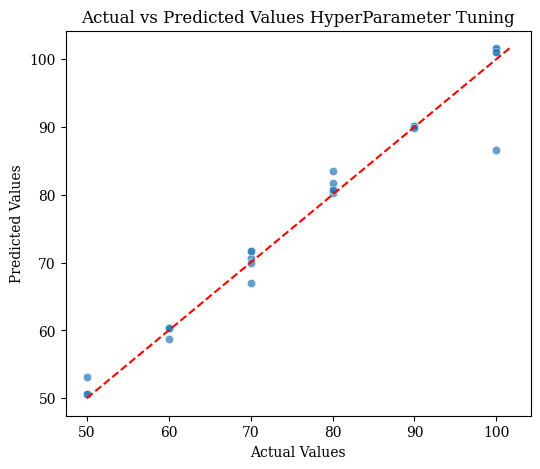

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prediksi hasil dengan model yang sudah dilatih
y_pred = best_model.predict(X_test)
y_pred_inv = inverse_transform_y(y_pred)  # Invers transformasi jika diperlukan
y_test_inv = inverse_transform_y(y_test)
# Plot scatter Actual vs Predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test_inv.flatten(), y=y_pred_inv.flatten(), alpha=0.7)

# Garis referensi y = x (ideal jika prediksi sempurna)
min_val = min(y_test_inv.min(), y_pred_inv.min())
max_val = max(y_test_inv.max(), y_pred_inv.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="red")

# Label dan judul
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values HyperParameter Tuning")

plt.show()


In [40]:
from sklearn.metrics import r2_score
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared after tuning: {r2:.4f}')
msE = mean_squared_error(y_test, y_pred)
print(f'MSE after tuning: {msE:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
R-squared after tuning: 0.9643
MSE after tuning: 0.0107


In [43]:
y_preds = []
for i in range(120):
    X_pred = df.iloc[i, :-1].values  # Ambil fitur dari setiap baris
    X_pred = scaler_X.transform(X_pred.reshape(1, -1))  # Normalisasi
    X_pred = X_pred.reshape(1, 18, 1)  # Ubah ke bentuk yang sesuai untuk model

    y_pred = best_model.predict(X_pred)  # Prediksi dengan model terbaik
    y_pred = inverse_transform_y(y_pred)  # Invers transformasi jika diperlukan

    # Pastikan bentuk y_pred adalah (1, 1) sebelum mengakses indeks
    y_preds.append(y_pred.item())  # Gunakan .item() untuk mengambil nilai skalar


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

In [44]:
for i, pred in enumerate(y_preds):
    print(f"Data {i+1}: Prediksi = {pred}")

Data 1: Prediksi = 101.07846069335938
Data 2: Prediksi = 101.07846069335938
Data 3: Prediksi = 101.07846069335938
Data 4: Prediksi = 101.07846069335938
Data 5: Prediksi = 101.07846069335938
Data 6: Prediksi = 101.07846069335938
Data 7: Prediksi = 101.07846069335938
Data 8: Prediksi = 101.5075454711914
Data 9: Prediksi = 101.5075454711914
Data 10: Prediksi = 101.5075454711914
Data 11: Prediksi = 101.5075454711914
Data 12: Prediksi = 86.57645416259766
Data 13: Prediksi = 102.24028015136719
Data 14: Prediksi = 102.24028015136719
Data 15: Prediksi = 102.24028015136719
Data 16: Prediksi = 101.4759521484375
Data 17: Prediksi = 101.5075454711914
Data 18: Prediksi = 101.60734558105469
Data 19: Prediksi = 101.60734558105469
Data 20: Prediksi = 101.60734558105469
Data 21: Prediksi = 89.59921264648438
Data 22: Prediksi = 89.59921264648438
Data 23: Prediksi = 90.12796783447266
Data 24: Prediksi = 90.12796783447266
Data 25: Prediksi = 89.03561401367188
Data 26: Prediksi = 89.11809539794922
Data 27:

# SAVE MODEL HYPERPARAMETER TUNING

In [45]:
best_model.save("model_tuning_spektroskopi_new.h5")

In [46]:
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()

# Save the model.
with open('model_tuning_spektroskopi_new.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmp1smyn5hn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 18, 1), dtype=tf.float32, name='keras_tensor_29')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137580131214224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137580131213264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137580131209040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137580131218448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137580131218256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137580131219216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137580131219024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137580131219984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137580131219792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137580131220752: TensorSpec(shape=(), dtype=tf.resource, name=None)
